In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2023.csv")
df_2023 = pd.read_csv(csv_path)

df_2023

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2023,8/17/2023,10/25/2023,1,12152.45000,Lightning
1,2023,8/17/2023,9/28/2023,1,95.91678,Lightning
2,2023,8/19/2023,9/2/2023,1,20.01698,Lightning
3,2023,8/15/2023,9/15/2023,1,1684.73000,Lightning
4,2023,8/15/2023,10/25/2023,1,34188.45000,Lightning
...,...,...,...,...,...,...
278,2023,7/1/2023,7/2/2023,2,27.81446,Equipment Use
279,2023,7/11/2023,7/11/2023,9,58.76023,Miscellaneous
280,2023,7/11/2023,7/12/2023,14,70.97900,Unknown / Unidentified
281,2023,6/18/2023,6/18/2023,14,28.63791,Unknown / Unidentified


In [3]:
# Convert 'Alarm Date' to datetime
df_2023['Alarm Date'] = pd.to_datetime(df_2023['Alarm Date'])

# Extract month name
df_2023['Month'] = df_2023['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2023 = df_2023.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2023['Month'] = pd.Categorical(monthly_summary_2023['Month'], categories=months_order, ordered=True)
monthly_summary_2023 = monthly_summary_2023.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2023['Total Acres Burned'] = monthly_summary_2023['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2023)

       Month  Number of Incidents  Total Acres Burned
5      March                    1               15.25
0      April                    4              364.35
6        May                   23             1365.28
4       June                   43             4524.76
3       July                   60           109235.62
1     August                   78           206759.90
9  September                   27            12719.27
8    October                   24             3569.39
7   November                   14              511.62
2   December                    9             2959.55


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


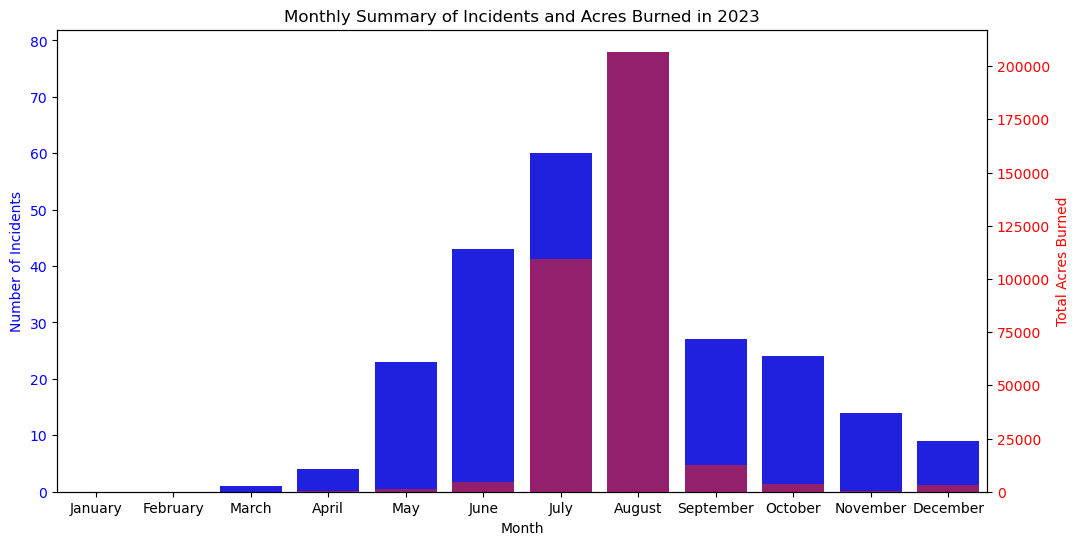

In [4]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2023, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2023, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2023')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2023.png")
plt.savefig(output_file)

plt.show()